In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv('D:/Learn Streamlit Python/07 Module 03 - Project Section - Building Streamlit Apps - Machine Learning Apps/diabetes_prediction_ml_app/data/diabetes_data_upload.csv')

In [6]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [7]:
df.shape

(520, 17)

In [8]:
df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [9]:
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [10]:
df.columns.str.lower().str.replace(' ','_')

Index(['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss',
       'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
       'itching', 'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity', 'class'],
      dtype='object')

In [11]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [12]:
df.columns

Index(['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss',
       'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
       'itching', 'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity', 'class'],
      dtype='object')

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
objList = df.select_dtypes(include='object').columns

In [15]:
objList

Index(['gender', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness',
       'polyphagia', 'genital_thrush', 'visual_blurring', 'itching',
       'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity', 'class'],
      dtype='object')

In [16]:
columns_to_label_encode = ['polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness',
       'polyphagia', 'genital_thrush', 'visual_blurring', 'itching',
       'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity']

In [17]:
LE = LabelEncoder()

In [18]:
#enocde every column except age,gender and class
for col in columns_to_label_encode:
    df[col] = LE.fit_transform(df[col].astype(str))

In [19]:
df.dtypes

age                    int64
gender                object
polyuria               int32
polydipsia             int32
sudden_weight_loss     int32
weakness               int32
polyphagia             int32
genital_thrush         int32
visual_blurring        int32
itching                int32
irritability           int32
delayed_healing        int32
partial_paresis        int32
muscle_stiffness       int32
alopecia               int32
obesity                int32
class                 object
dtype: object

In [20]:
df.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,Positive
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,Positive
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,Positive
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,Positive
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,Positive


In [21]:
print(LE.classes_)

['No' 'Yes']


In [22]:
#another method for encoding gender and class columns
gender_map = {'Female':0,'Male':1}
target_label_map = {'Negative':0,'Positive':1}

In [23]:
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [24]:
df['gender'] = df['gender'].map(gender_map)

In [25]:
df['gender'].head()

0    1
1    1
2    1
3    1
4    1
Name: gender, dtype: int64

In [26]:
#for target label
df['class'].unique()
df['class'] = df['class'].map(target_label_map)


In [27]:
df.dtypes

age                   int64
gender                int64
polyuria              int32
polydipsia            int32
sudden_weight_loss    int32
weakness              int32
polyphagia            int32
genital_thrush        int32
visual_blurring       int32
itching               int32
irritability          int32
delayed_healing       int32
partial_paresis       int32
muscle_stiffness      int32
alopecia              int32
obesity               int32
class                 int64
dtype: object

In [28]:
df.describe()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,48.028846,0.630769,0.496154,0.448077,0.417308,0.586538,0.455769,0.223077,0.448077,0.486538,0.242308,0.459615,0.430769,0.375000,0.344231,0.169231,0.615385
std,12.151466,0.483061,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317,0.486973
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.500000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
df['class']

0      1
1      1
2      1
3      1
4      1
      ..
515    1
516    1
517    1
518    0
519    0
Name: class, Length: 520, dtype: int64

In [30]:
df['class'].value_counts()

1    320
0    200
Name: class, dtype: int64

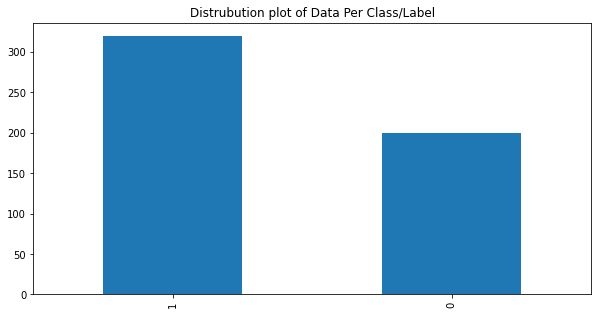

In [31]:
plt.figure(figsize=(10,5))
plt.title("Distrubution plot of Data Per Class/Label")
df['class'].value_counts().plot(kind='bar')
plt.show()

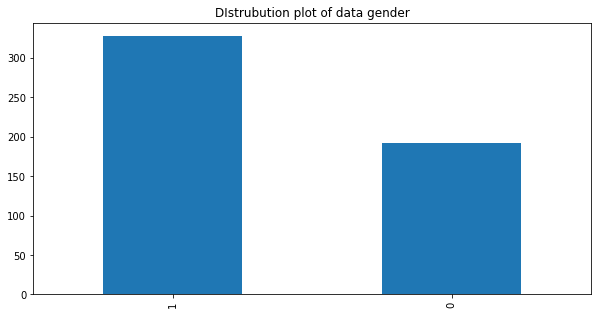

In [32]:
#plot for gender
plt.figure(figsize=(10,5))
plt.title("DIstrubution plot of data gender")
df['gender'].value_counts().plot(kind='bar')
plt.show()

In [33]:
#frequency distrubution table using Age Range
print("Max",df['age'].max())
print("Min", df['age'].min())

Max 90
Min 16


In [34]:
labels = ["less than 10","10-20","20-30","30-40","40-50","50-60","60-70","70-80","*0 and more"]
bins= [0,10,20,30,40,50,60,70,80,90]

In [35]:
freq_df = df.groupby(pd.cut(df['age'],bins=bins,labels=labels)).size()
freq_df.head()

age
less than 10      0
10-20             1
20-30            44
30-40           123
40-50           145
dtype: int64

In [36]:
freq_df = freq_df.reset_index(name='count')
freq_df.head()

,age,count
0,less than 10,0
1,10-20,1
2,20-30,44
3,30-40,123
4,40-50,145


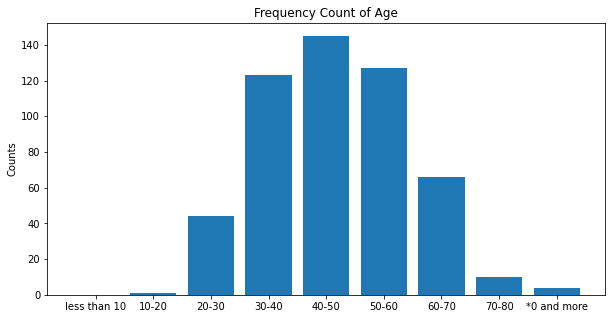

In [37]:
#plot of distrubution of data per gender
plt.figure(figsize=(10,5))
plt.bar(freq_df['age'],freq_df['count'])
plt.ylabel('Counts')
plt.title('Frequency Count of Age')
plt.show()

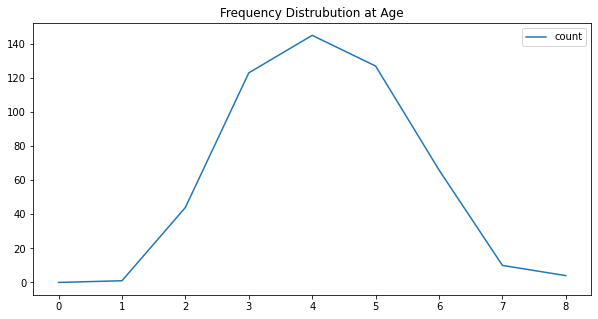

In [38]:
#plot of distrubution of data per gender
freq_df.plot(kind='line',figsize=(10,5))
plt.title("Frequency Distrubution at Age")
plt.show()

C:\Users\Harsh Upadhyay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

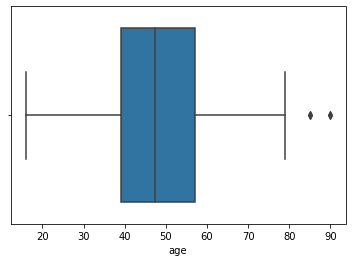

In [39]:
#outliers for age
sns.boxplot(df['age'])

In [40]:
df.corr()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
age,1.000000,0.062872,0.199781,0.137382,0.064808,0.224596,0.315577,0.096519,0.402729,0.296559,0.201625,0.257501,0.232742,0.307703,0.321691,0.140458,0.108679
gender,0.062872,1.000000,-0.268894,-0.312262,-0.281840,-0.124490,-0.219968,0.208961,-0.208092,-0.052496,-0.013735,-0.101978,-0.332288,-0.090542,0.327871,-0.005396,-0.449233
polyuria,0.199781,-0.268894,1.000000,0.598609,0.447207,0.263000,0.373873,0.087273,0.235095,0.088289,0.237740,0.149873,0.441664,0.152938,-0.144192,0.126567,0.665922
polydipsia,0.137382,-0.312262,0.598609,1.000000,0.405965,0.332453,0.316839,0.028081,0.331250,0.128716,0.203446,0.115691,0.442249,0.180723,-0.310964,0.098691,0.648734
sudden_weight_loss,0.064808,-0.281840,0.447207,0.405965,1.000000,0.282884,0.243511,0.089858,0.068754,-0.004516,0.140340,0.088140,0.264014,0.109756,-0.202727,0.169294,0.436568
weakness,0.224596,-0.124490,0.263000,0.332453,0.282884,1.000000,0.180266,0.027780,0.301043,0.309440,0.146698,0.335507,0.272982,0.263164,0.090490,0.045665,0.243275
polyphagia,0.315577,-0.219968,0.373873,0.316839,0.243511,0.180266,1.000000,-0.063712,0.293545,0.144390,0.239466,0.263980,0.373569,0.320031,-0.053498,0.029785,0.342504
genital_thrush,0.096519,0.208961,0.087273,0.028081,0.089858,0.027780,-0.063712,1.000000,-0.148408,0.125336,0.160551,0.136111,-0.195612,-0.100188,0.204847,0.053828,0.110288
visual_blurring,0.402729,-0.208092,0.235095,0.331250,0.068754,0.301043,0.293545,-0.148408,1.000000,0.291191,0.077095,0.177767,0.364156,0.412369,0.014604,0.109005,0.251300
itching,0.296559,-0.052496,0.088289,0.128716,-0.004516,0.309440,0.144390,0.125336,0.291191,1.000000,0.114006,0.453316,0.116669,0.215575,0.266506,0.001894,-0.013384


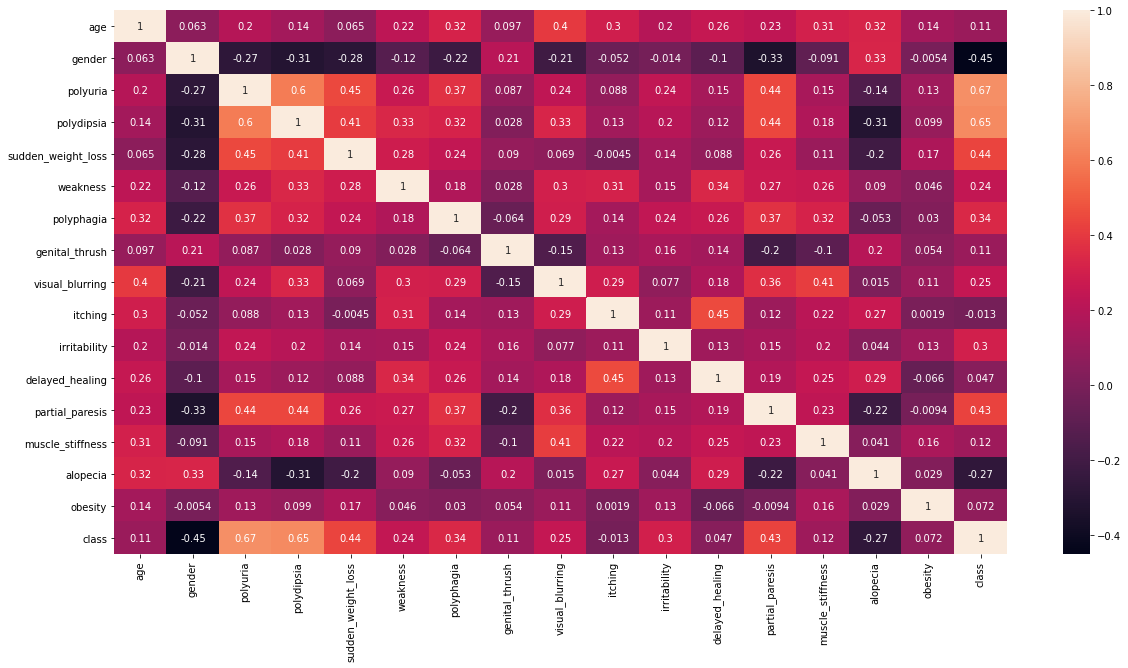

In [41]:
#plot the heat map
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()


In [42]:
corr_matrix = df.corr()

<AxesSubplot:>

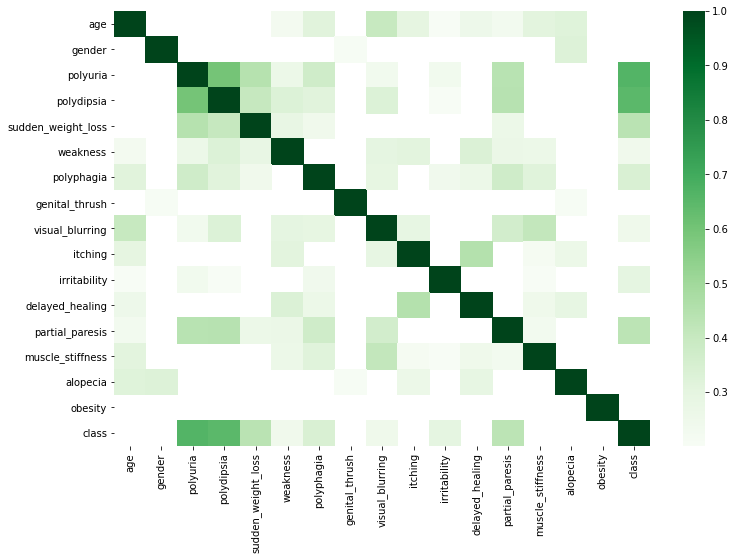

In [43]:
highest_corr = corr_matrix[corr_matrix>=.2]
plt.figure(figsize=(12,8))
sns.heatmap(highest_corr, cmap='Greens')

In [44]:
#list the feature with highest correlation coefficient
s = corr_matrix.abs().unstack()
top_features_per_correlation = s.sort_values(kind="quicksort")
print(top_features_per_correlation)

obesity             itching               0.001894
itching             obesity               0.001894
                    sudden_weight_loss    0.004516
sudden_weight_loss  itching               0.004516
obesity             gender                0.005396
                                            ...   
polydipsia          polydipsia            1.000000
polyuria            polyuria              1.000000
gender              gender                1.000000
obesity             obesity               1.000000
class               class                 1.000000
Length: 289, dtype: float64


# Feature Engineering and selection

In [45]:
from sklearn.feature_selection import SelectKBest, chi2,RFE
from sklearn.ensemble import ExtraTreesClassifier

In [46]:
df.columns

Index(['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss',
       'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
       'itching', 'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity', 'class'],
      dtype='object')

In [47]:
X=df[['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss',
       'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
       'itching', 'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity']]
y=df['class']

In [48]:
skb = SelectKBest(score_func=chi2,k=10)
best_feature_fit = skb.fit(X,y)

In [49]:
feature_scores = pd.DataFrame(best_feature_fit.scores_, columns=['Feature_Scores'])

In [50]:
feature_column_names = pd.DataFrame(X.columns, columns=['Feature_name'])
best_feat_df = pd.concat([feature_scores, feature_column_names],axis=1)

In [51]:
#list of features
best_feat_df

,Feature_Scores,Feature_name
0,18.845767,age
1,38.747637,gender
2,116.184593,polyuria
3,120.785515,polydipsia
4,57.749309,sudden_weight_loss
5,12.724262,weakness
6,33.198418,polyphagia
7,4.914009,genital_thrush
8,18.124571,visual_blurring
9,0.047826,itching


In [52]:
#get the best feature
best_feat_df.nlargest(10, 'Feature_Scores')

,Feature_Scores,Feature_name
3,120.785515,polydipsia
2,116.184593,polyuria
4,57.749309,sudden_weight_loss
12,55.314286,partial_paresis
1,38.747637,gender
10,35.334127,irritability
6,33.198418,polyphagia
14,24.402793,alopecia
0,18.845767,age
8,18.124571,visual_blurring


In [53]:
#which of these features are important using ExtraTreesClassifier
et_clf = ExtraTreesClassifier()
et_clf.fit(X,y)

ExtraTreesClassifier()

In [54]:
print(et_clf.feature_importances_)

[0.05133849 0.114392   0.23401016 0.19655313 0.05576865 0.02250916
 0.02722428 0.02182044 0.03301169 0.03694907 0.0424576  0.03791101
 0.03395018 0.02858981 0.04456955 0.01894478]


In [55]:
#convert to a dataframe
feature_importance_df = pd.Series(et_clf.feature_importances_,index=X.columns)

In [56]:
feature_importance_df.head()

age                   0.051338
gender                0.114392
polyuria              0.234010
polydipsia            0.196553
sudden_weight_loss    0.055769
dtype: float64

<AxesSubplot:>

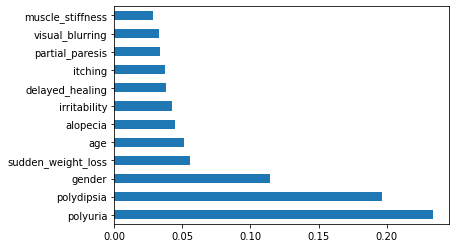

In [57]:
feature_importance_df.nlargest(12).plot(kind='barh')

In [58]:
#machine learning model

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [60]:
print(X.columns)

Index(['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss',
       'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
       'itching', 'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity'],
      dtype='object')


In [61]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=7)

# Logistic Regression

In [62]:
#logisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)

LogisticRegression()

In [63]:
#check model accuracy
#method 1
lr_model.score(x_test,y_test)

0.8910256410256411

In [64]:
#model accuracy
y_pred = lr_model.predict(x_test)
print("Accuracy of LR model:{}".format(accuracy_score(y_test,y_pred)))

Accuracy of LR model:0.8910256410256411


# Since this classification problem we will evaluate our model with other metrics such as classification report and confusion matrix

In [71]:
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix,plot_precision_recall_curve,plot_roc_curve

In [72]:
target_names=["Negative(0)","Positive(1)"]

In [73]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.95      0.88        63
           1       0.96      0.85      0.90        93

    accuracy                           0.89       156
   macro avg       0.89      0.90      0.89       156
weighted avg       0.90      0.89      0.89       156



In [74]:
#confusion matrix
confusion_matrix(y_test,y_pred)

array([[60,  3],
       [14, 79]], dtype=int64)

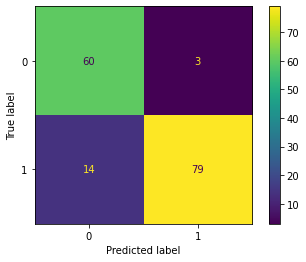

In [75]:
plot_confusion_matrix(lr_model,x_test,y_test)

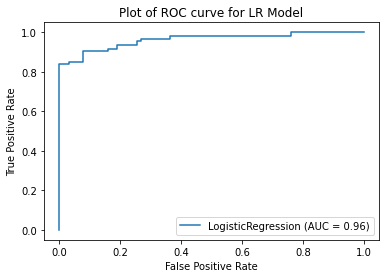

In [77]:
#ROC curve
plot_roc_curve(lr_model, x_test, y_test)
plt.title("Plot of ROC curve for LR Model")
plt.show()

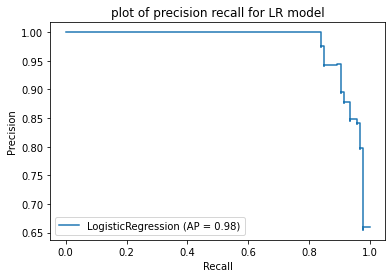

In [78]:
plot_precision_recall_curve(lr_model, x_test, y_test)
plt.title("plot of precision recall for LR model")
plt.show()

In [79]:
#CRoss validation
from sklearn.model_selection import cross_val_score

In [80]:
def cross_validate_model(model_estimator,X,y,cv):
    scores = cross_val_score(model_estimator, X, y, scoring='accuracy', cv=cv)
    result = "Mean Accuracy: {} Standard_deviation: {}".format(np.mean(scores), np.std(scores))
    return result

In [83]:
#cross_validation for LR
cv_scores_for_lr_model = cross_validate_model(LogisticRegression(),X,y,5)
print(cv_scores_for_lr_model)

C:\Users\Harsh Upadhyay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Harsh Upadhyay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

Mean Accuracy: 0.926923076923077 Standard_deviation: 0.036284542815602304


# DecisionTree

In [85]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [86]:
y_pred2 = dt_model.predict(x_test)
print("Accuracy of Decision Tree Model: {}".format(accuracy_score(y_test,y_pred2)))

Accuracy of Decision Tree Model: 0.9807692307692307


In [87]:
print(classification_report(y_test,y_pred2,target_names=target_names))

              precision    recall  f1-score   support

 Negative(0)       0.98      0.97      0.98        63
 Positive(1)       0.98      0.99      0.98        93

    accuracy                           0.98       156
   macro avg       0.98      0.98      0.98       156
weighted avg       0.98      0.98      0.98       156



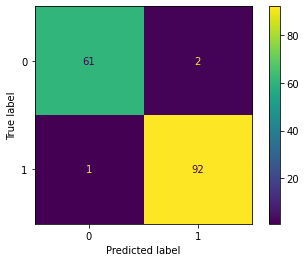

In [88]:
plot_confusion_matrix(dt_model, x_test, y_test)

In [90]:
#comparing F! score
from sklearn.metrics import f1_score
f1_for_lr_model = f1_score(y_test, y_pred, average='macro')
f1_for_dt_model = f1_score(y_test, y_pred2, average='macro')
print("LR f1 score",f1_for_lr_model)
print("DT F1 score",f1_for_dt_model)

LR f1 score 0.8893847758081335
DT F1 score 0.9799786096256684


In [104]:
#cross validation
cv_scores_for_dt_model = cross_validate_model(DecisionTreeClassifier(),X,y,5)
print(cv_scores_for_dt_model)

Mean Accuracy: 0.9615384615384615 Standard_deviation: 0.028523840334983314


In [105]:
#SAving model
import joblib

In [106]:
model_file = open("logistic_regression_model_diabetes.pkl","wb")
joblib.dump(lr_model,model_file)
model_file.close()

In [109]:
model_file_dt = open("DecisionTree_model_diabetes.pkl","wb")
joblib.dump(dt_model,model_file_dt)
model_file.close()